In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from utils.displayData import displayData
from utils.lrCostFunction import lrCostFunction
from utils.oneVsAll import oneVsAll

Loading and Visualizing Data ...


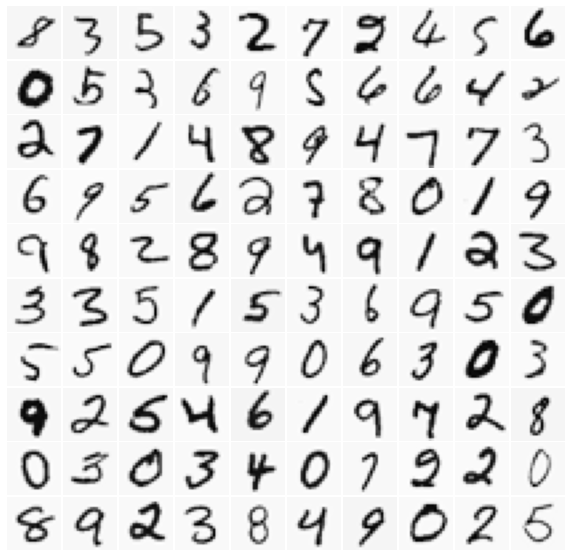

In [4]:
print("Loading and Visualizing Data ...")

data = sio.loadmat("ex3data1.mat")
X = data["X"]
y = data["y"]

row,col = X.shape

rand_indices = np.random.permutation(row)
sel = X[rand_indices[:100]]

displayData(sel)

In [5]:
print("Testing lrCostFunction() with regularization\n")

theta_t = np.array([-2, -1, 1, 2]).reshape(4,)

X_0 = np.ones((5,1))
X_test = (np.arange(1,16).reshape(5,3,order="F")) / 10
X_t = np.concatenate((X_0,X_test),axis=1)
y_t = np.array([1,0,1,0,1]).reshape(-1)
l = 3

J,grad = lrCostFunction(theta_t, X_t, y_t, l);

print('Expected cost: 2.534819')
print('Calucalted cost: {:.6f}\n'.format(J))

print('Expected Gradients:\n');
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')

print('Calculated gradients:\n');
print('{}\n{}\n{}\n{}\n'.format(*grad))

Testing lrCostFunction() with regularization

Expected cost: 2.534819
Calucalted cost: 2.534819

Expected Gradients:

 0.146561
 -0.548558
 0.724722
 1.398003

Calculated gradients:

0.14656136792489802
-0.5485584118531603
0.7247222721092885
1.3980029560717375



In [6]:
data = sio.loadmat("ex3data1.mat")


X = data["X"]
y = data["y"].reshape(-1)
l = 0.1
num_labels = 10


all_theta = oneVsAll(X,y,num_labels,l)


Working on num: 0
Working on num: 1
Working on num: 2
Working on num: 3
Working on num: 4
Working on num: 5
Working on num: 6
Working on num: 7
Working on num: 8
Working on num: 9
